In [2]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Plotting Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [3]:
aes_data_dir      = '/Volumes/TI27457/ttb/circuits/aes-logs-50ktests-5kres-100ps'
aes_counter_df    = load_data_df(aes_data_dir)
aes_counter_sizes = load_counter_sizes(aes_data_dir)

In [4]:
# Split Data by Counter Type
aes_ctype_groups  = aes_counter_df.groupby('Counter Type')
# uart_ctype_groups = uart_counter_df.groupby('Counter Type')

# Plot Settings

In [8]:
# Plot Settings
FIG_WIDTH  = 12
FIG_HEIGHT = 6
SAVE_AS_PDF = True
AES_PDF_FILENAME = 'aes_false_positives.pdf'
# UART_PDF_FILENAME = 'uart_false_positives.pdf'
CTYPES = ['TJFREE']
# CTYPES = ['CDD', 'CDN', 'CND', 'CNN', 'DDD', 'DDN', 'DND', 'DNN', 'TJFREE']

# Plot Counter Size Histogram

[  8.  20.  32.  44.  56.  68.  80.  92. 104. 116. 128.] <a list of 10 Patch objects>


Text(0.5,1,'Coalesced Counter Sizes')

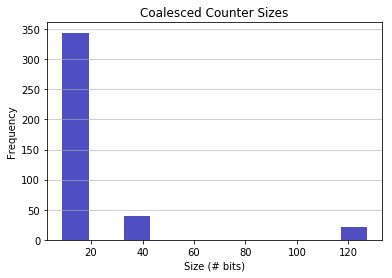

In [9]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=aes_counter_sizes['Coalesced Sizes'], bins=10, color='#0504aa', alpha=0.7, rwidth=0.85)
print bins, patches
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Size (# bits)')
plt.ylabel('Frequency')
plt.title('Coalesced Counter Sizes')
# plt.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Plot AES Data

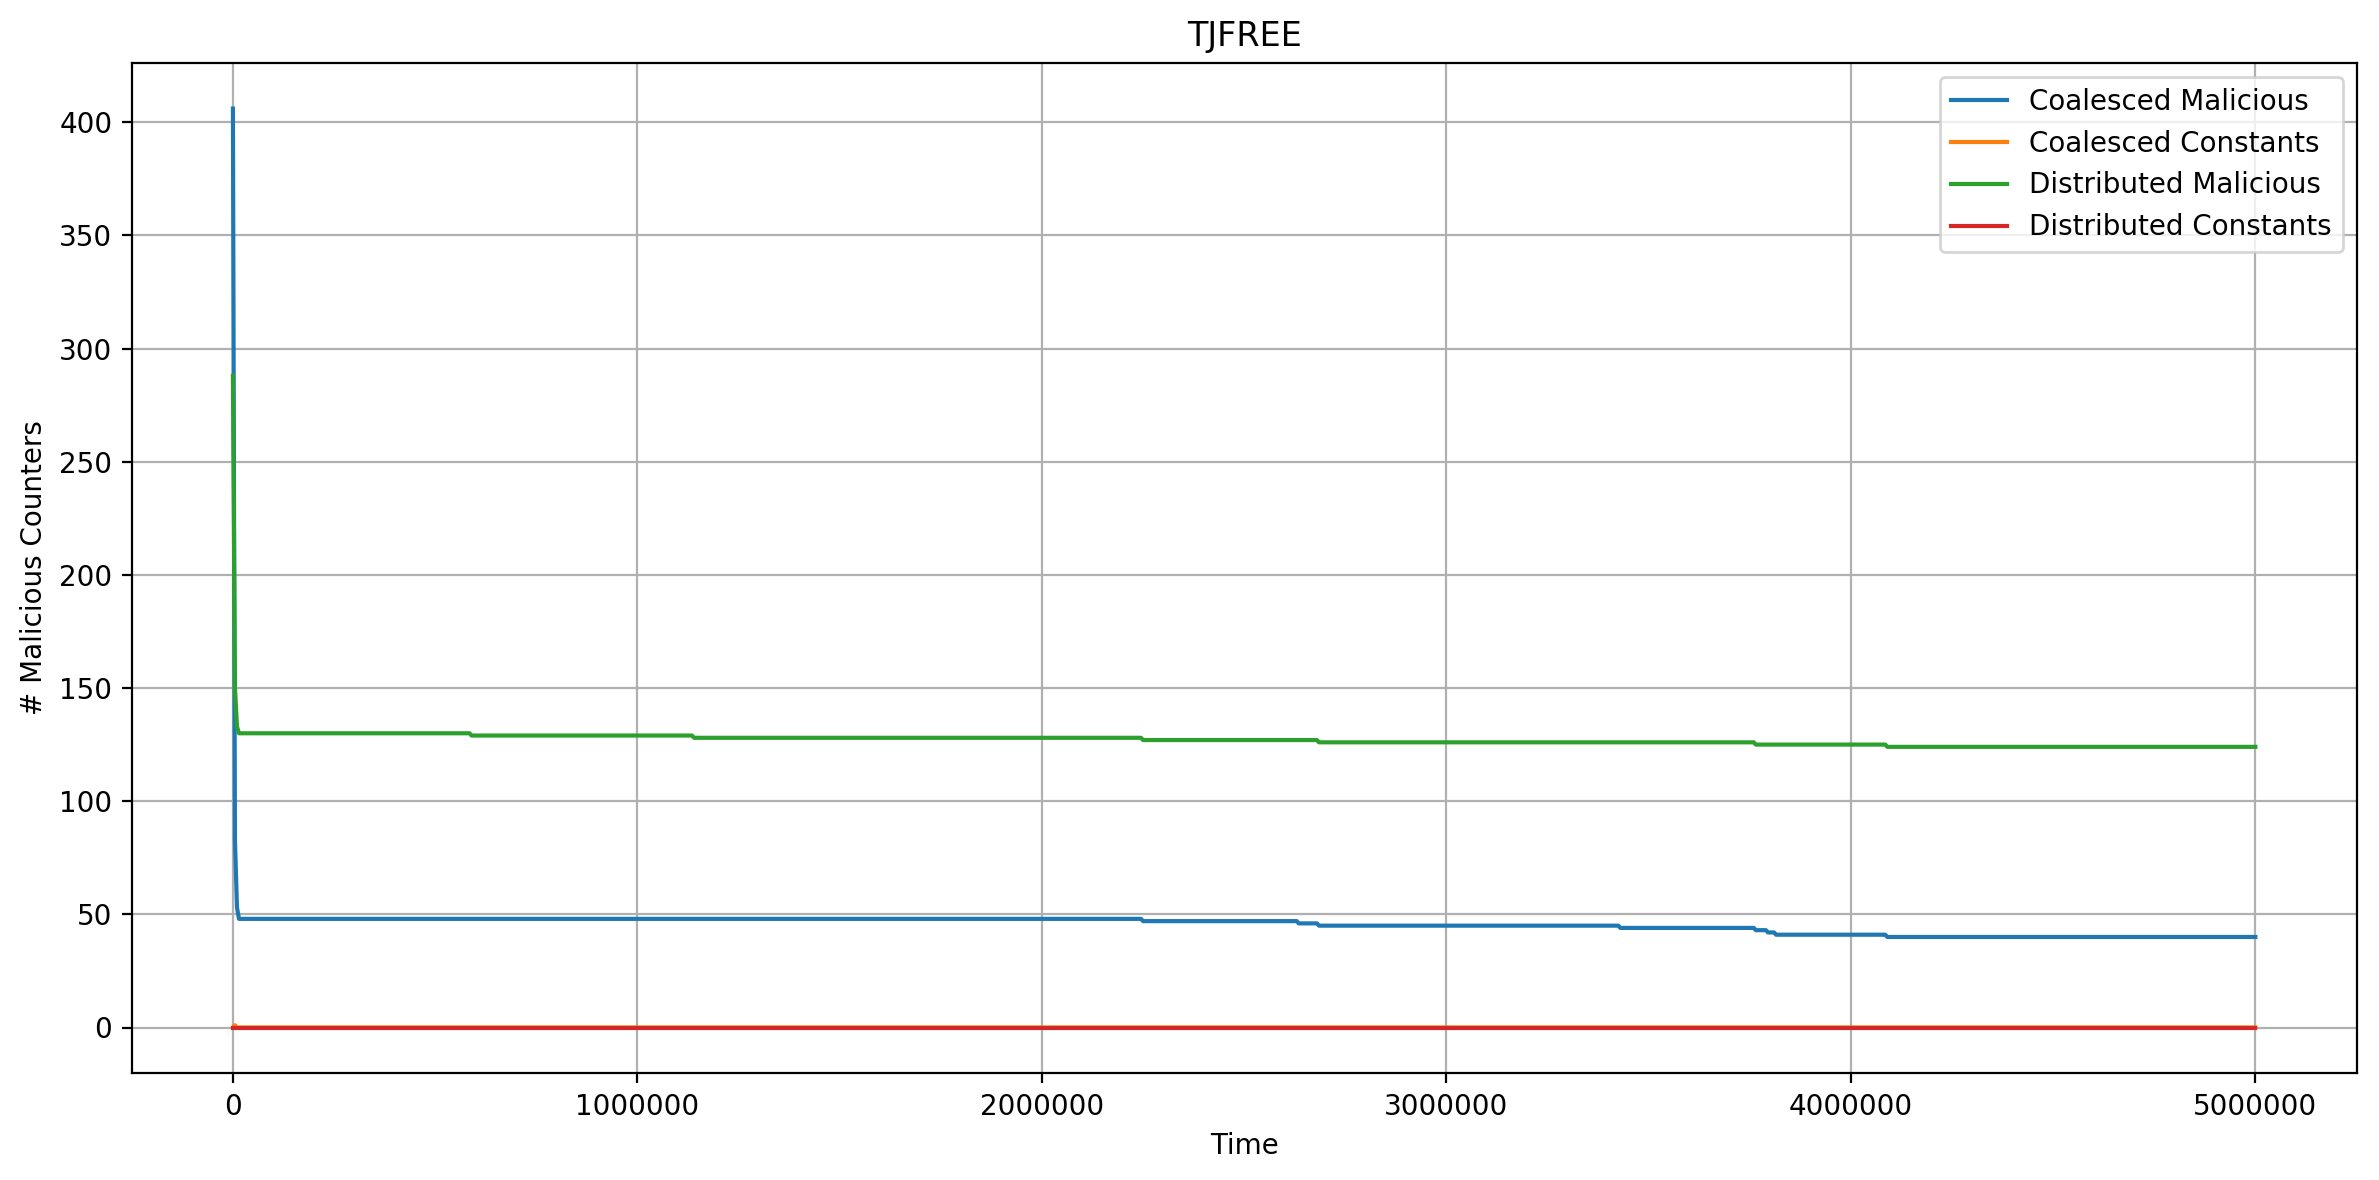

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

# for i in range(len(axes.flat)):
for i in range(1):
#     ax    = axes.flat[i]
    ax    = axes
    ctype = CTYPES[i]
    df    = aes_ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="Time", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Coalesced Constants", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Malicious", data=df, ax=ax)
    sns.lineplot(x="Time", y="Distributed Constants", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('Time')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Coalesced Constants", "Distributed Malicious", "Distributed Constants"])
plt.tight_layout(h_pad=1)

if SAVE_AS_PDF:
    plt.savefig(AES_PDF_FILENAME, format='pdf')

# Plot UART Data

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

for i in range(len(axes.flat)):
    ax    = axes.flat[i]
    ctype = CTYPES[i]
    df    = uart_ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="# Tests", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="# Tests", y="Distributed Malicious", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('# Tests')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Distributed Malicious"])
plt.tight_layout(h_pad=1)

if SAVE_AS_PDF:
    plt.savefig(UART_PDF_FILENAME, format='pdf')